# Importing Libraries:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/14407.png
/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/2555.png
/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/14516.png
/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/14371.png
/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/35969.png
/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/26374.png
/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/26341.png
/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/040_01.jpg
/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/14470.png
/kaggle/input/nepali-barnamala-hand-written-data-set/NHWDataset/train/character_28_la/2493.png
/kaggle/input/nepali-barnamala-hand-writt

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

To be very honest, this is my second kernel in which I am working with convolutional neural networks. I am using the FastAI library because it is nothing less than awesome when it comes to working with cnns:

In [3]:
from fastai.vision import *
from fastai.metrics import accuracy

# Visualising the Data:

In [4]:
path = "../input/nepali-barnamala-hand-written-data-set/NHWDataset/test"
traindata = ImageDataBunch.from_folder(path, ds_tfms = get_transforms(do_flip=False, flip_vert=False),
                                      valid_pct=0.3, size=256,
                                      bs=16)

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2314 missing from current font.
  font.set_text(s, 0, flags=flags)


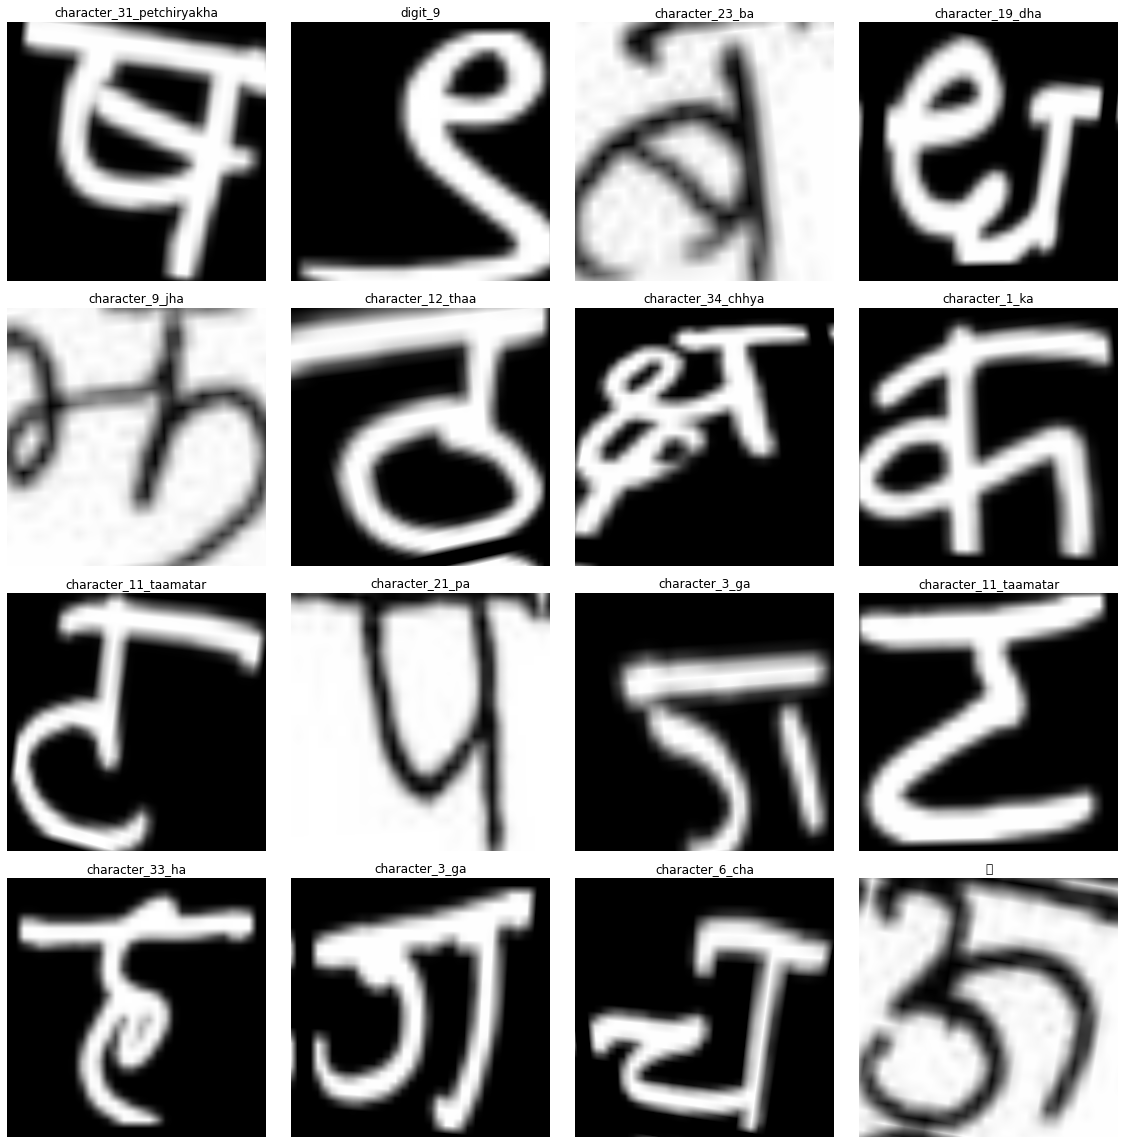

In [5]:
traindata.show_batch(row=3)

In [6]:
print(traindata.classes)

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9', 'अ', 'अं', 'अः', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ']


# Training the data:

In [7]:
learn = cnn_learner(traindata, models.resnet34, metrics = accuracy,  model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


Building the model:

In [8]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Fitting the model:

In [9]:
learn.fit_one_cycle(5)

Almost 94% accuracy isn't that bad! :)

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


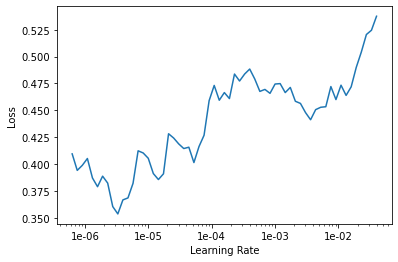

In [11]:
learn.recorder.plot()

# Predicting on the Data:

In [12]:
image = open_image("../input/nepali-barnamala-hand-written-data-set/NHWDataset/test/character_14_dhaa/017_02.jpg")

<Figure size 360x360 with 0 Axes>

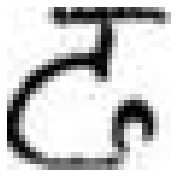

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
image.show()


In [14]:
pred_class, pred_idx, pred_outputs = learn.predict(image)

In [15]:
print(pred_class)

character_14_dhaa


In [16]:
image2 = open_image("../input/nepali-barnamala-hand-written-data-set/NHWDataset/test/character_21_pa/017_07.jpg")

<Figure size 360x360 with 0 Axes>

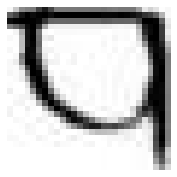

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
image2.show()


In [18]:
pred_class, pred_idx, pred_outputs = learn.predict(image2)
print(pred_class)

character_21_pa


I hope this helped! Thank you for going through this notebook mate :D